# Statistics Advanced - 2

 1. What is hypothesis testing in statistics?

     -> Hypothesis testing in statistics is a method used to make decisions or draw conclusions about a population based on sample data.

 2.  What is the null hypothesis, and how does it differ from the alternative  hypothesis?

      -> The null hypothesis (H₀) and the alternative hypothesis (H₁ or Ha) are the two competing statements in hypothesis testing, and they represent opposite views about a population parameter. Null Hypothesis are hypothesis, which are no effect, no change or no difference in the population. It  Acts as the starting point in hypothesis testing.


 3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.
     
     -> Significance level (α) is the probability of rejecting H₀ when it is actually true — this is called a Type I error. It represents the maximum risk of being wrong that the researcher is willing to accept. The significance level is like setting a safety margin — if the evidence (p-value) passes that margin, you reject the default assumption (H₀).


  4.  What are Type I and Type II errors? Give examples of each.

      -> i.  Type 1 Error (False positive)
        
        -Rejecting the null hypothesis (H₀) when it is actually true. Example:

     a. A medical test says a healthy person has a disease.

     b. In a court case: Convicting an innocent person.

        ii. Type 2 Error (False Negative)

        - Failing to reject the null hypothesis (H₀) when it is actually false.

        Example:

      a. A medical test says a sick person is healthy.

       b. In a court case: Letting a guilty person go free.


  5. What is the difference between a Z-test and a T-test? Explain when to use each ?

      -> Z - test :

       Definition: A hypothesis test that uses the Z-distribution (standard normal distribution).

   When to Use:

  Large sample size (n ≥ 30).

  Population standard deviation (σ) is known.

  Data follows (or approximately follows) a normal distribution.

     -> T - test :

      Definition: A hypothesis test that uses the Student’s t-distribution.

     When to Use:

   Small sample size (n < 30).

   Population standard deviation (σ) is unknown (use sample standard deviation s instead).

   Data follows a normal distribution (or nearly normal for small n).


 6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.





















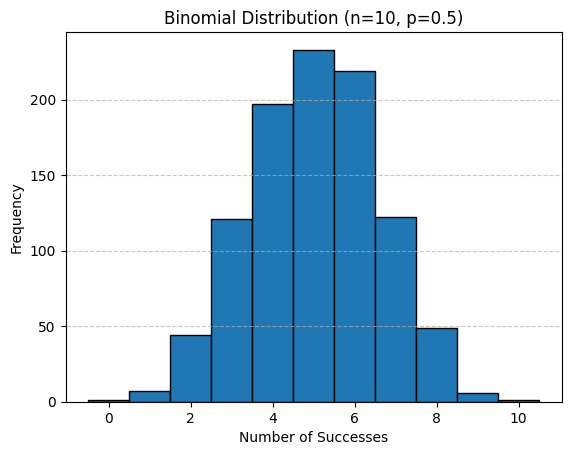

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10       # Number of trials
p = 0.5      # Probability of success
size = 1000  # Number of random samples

# Generate binomial distribution
data = np.random.binomial(n, p, size)

# Plot histogram
plt.hist(data, bins=range(n+2), edgecolor='black', align='left')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


7. Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.  sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
50.3, 50.4, 50.0, 49.7, 50.5, 49.9]


In [2]:
import numpy as np
from scipy.stats import norm

# Sample data
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

# Hypothesis parameters
mu_0 = 50       # Population mean under H0
sigma = 0.5     # Population standard deviation
alpha = 0.05    # Significance level

# Step 1: Calculate sample statistics
n = len(sample_data)
sample_mean = np.mean(sample_data)

# Step 2: Calculate Z-statistic
z_stat = (sample_mean - mu_0) / (sigma / np.sqrt(n))

# Step 3: Calculate p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Step 4: Decision
if p_value < alpha:
    decision = "Reject the null hypothesis"
else:
    decision = "Fail to reject the null hypothesis"

# Output results
print(f"Sample mean: {sample_mean:.4f}")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Decision: {decision}")


Sample mean: 50.0889
Z-statistic: 1.0667
P-value: 0.2861
Decision: Fail to reject the null hypothesis


8. Write a Python script to simulate data from a normal distribution and  calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


Sample Mean: 50.10
95% Confidence Interval: (49.79, 50.40)


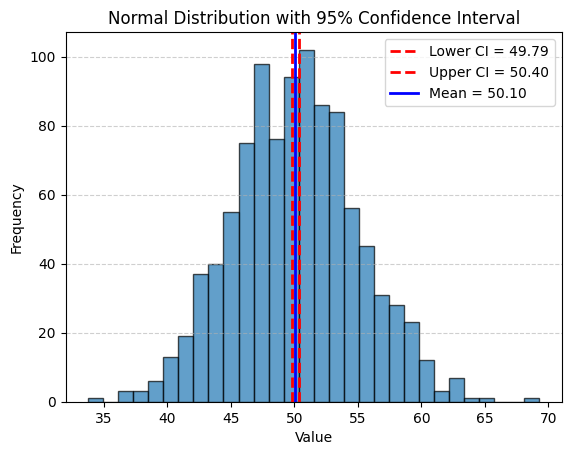

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Simulate normal distribution data
np.random.seed(42)  # for reproducibility
mean_true = 50      # true mean
std_dev = 5         # standard deviation
size = 1000         # number of samples

data = np.random.normal(mean_true, std_dev, size)

# Step 2: Calculate sample mean and standard error
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # sample standard deviation
std_error = sample_std / np.sqrt(size)

# Step 3: Calculate 95% confidence interval
confidence_level = 0.95
z_value = norm.ppf(1 - (1 - confidence_level) / 2)  # two-tailed z-value
margin_of_error = z_value * std_error
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Step 4: Plot histogram of the data
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(ci_lower, color='red', linestyle='dashed', linewidth=2, label=f'Lower CI = {ci_lower:.2f}')
plt.axvline(ci_upper, color='red', linestyle='dashed', linewidth=2, label=f'Upper CI = {ci_upper:.2f}')
plt.axvline(sample_mean, color='blue', linewidth=2, label=f'Mean = {sample_mean:.2f}')
plt.title('Normal Distribution with 95% Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


 9. Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent  in terms of standard deviations from the mean.


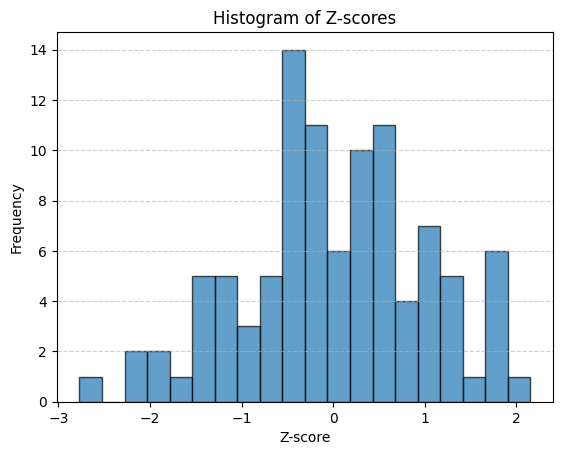

First 10 Z-scores: [ 0.66 -0.04  0.83  1.79 -0.14 -0.14  1.85  0.96 -0.4   0.71]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def z_score_standardization(data):
    """
    Calculate Z-scores for a dataset and plot a histogram.
    """
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # sample standard deviation
    z_scores = (data - mean) / std_dev

    # Plot histogram
    plt.hist(z_scores, bins=20, edgecolor='black', alpha=0.7)
    plt.title('Histogram of Z-scores')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    return z_scores

# Example usage
np.random.seed(42)
sample_data = np.random.normal(50, 5, 100)  # mean=50, std=5, n=100
z_scores = z_score_standardization(sample_data)

print("First 10 Z-scores:", np.round(z_scores[:10], 2))
